In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv("C:\\Users\\SHAARIF ANAS\\Desktop\\github\\SpaceX launch prediction\\SpaceX_2.csv")
df.head()

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,8191.07911,LEO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,1
1,2,2012-05-22,Falcon 9,525.00000,LEO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,1
2,3,2013-03-01,Falcon 9,677.00000,ISS,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,1
3,4,2013-09-29,Falcon 9,500.00000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.00000,GTO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,1


First, let's try to see how the `FlightNumber` (indicating the continuous launch attempts.) would affect the launch outcome in comparision to other variables.

###  Relationship between Flight Number and Pay load Mass

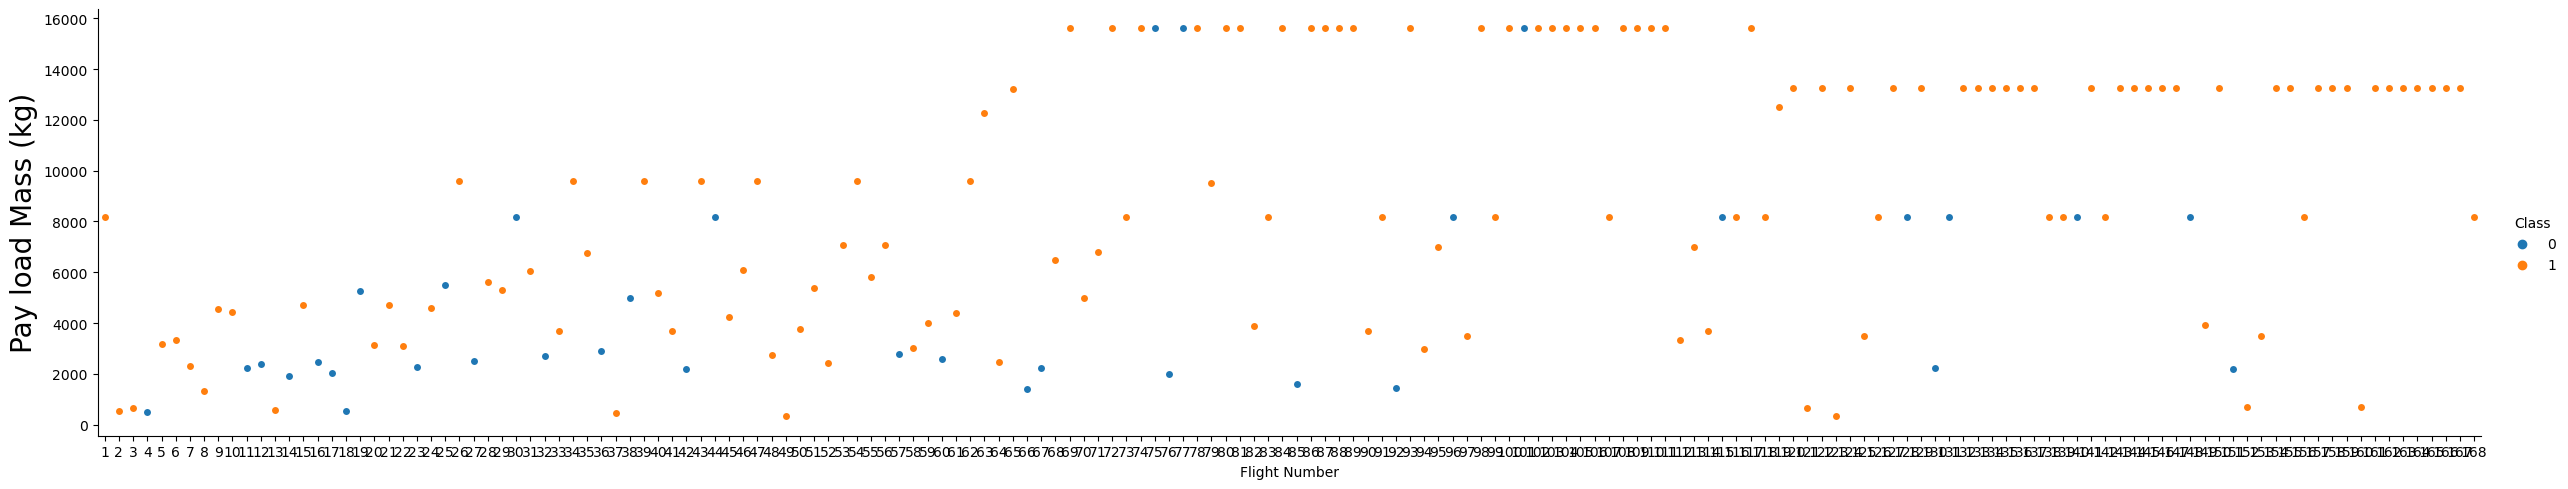

In [8]:
sns.catplot(y="PayloadMass", x='FlightNumber', hue="Class", data=df, aspect = 5)
plt.xlabel("Flight Number",fontsize=10)
plt.ylabel("Pay load Mass (kg)",fontsize=20)
plt.show()

 We see that as the flight number increases, the first stage is more likely to land successfully. The payload mass is also important; it seems the more massive the payload, the less likely the first stage will return.


###  Relationship between Flight Number and Launch Site

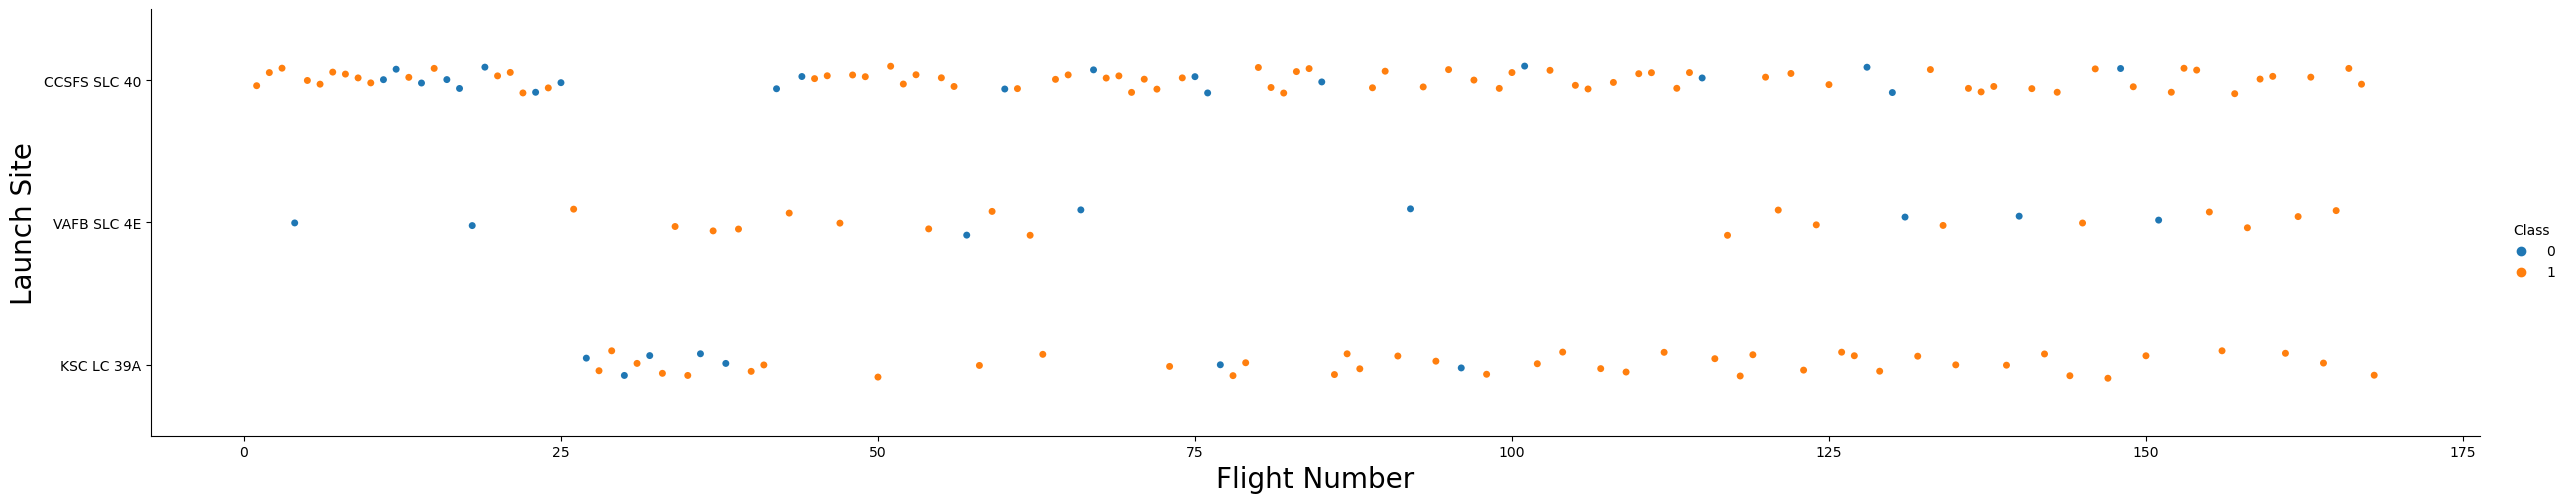

In [9]:
sns.catplot(y="LaunchSite", x="FlightNumber", hue="Class", data=df, aspect = 5)
plt.xlabel("Flight Number",fontsize=20)
plt.ylabel("Launch Site",fontsize=20)
plt.show()

We can see that <b>CCSFC SLC 40</b> has more launches than anyother launch site. Also, <b>KSC LC 39A</b> has all successful launches after flight number 100. And all launches are successful at all sites post flight number 150.

### Relationship between Payload and Launch Site


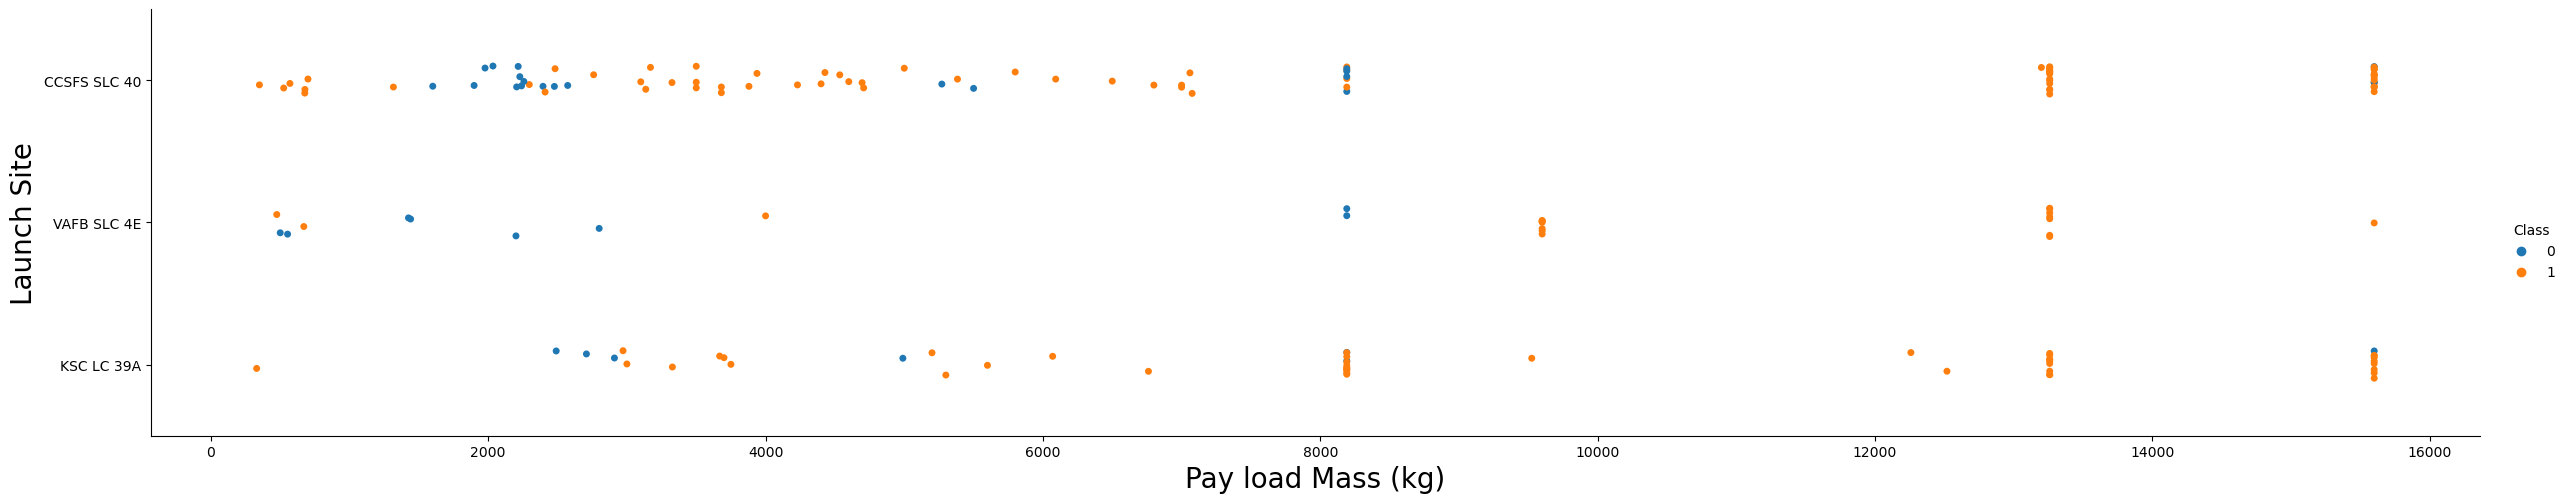

In [10]:
sns.catplot(y="LaunchSite", x="PayloadMass", hue="Class", data=df, aspect = 5)
plt.xlabel("Pay load Mass (kg)",fontsize=20)
plt.ylabel("Launch Site",fontsize=20)
plt.show()

We can see that all rockets launches with payload greater than <b>8000 kg</b> has resulted in a positive outcome.

### Relationship between success rate of each orbit type

<Axes: xlabel='Orbit', ylabel='Class'>

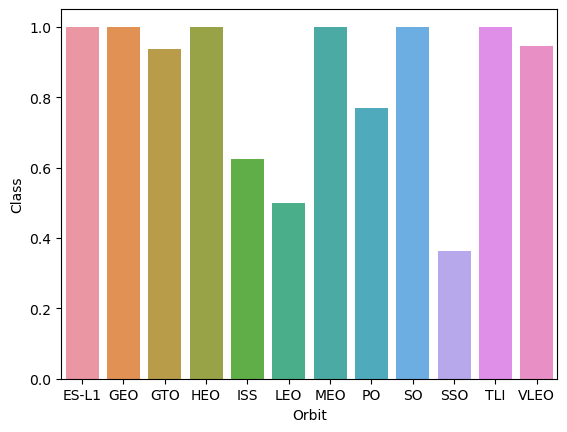

In [11]:
df3 = df.groupby('Orbit', as_index = False)['Class'].mean()
sns.barplot(x = 'Orbit', y = 'Class', data = df3)

We can see that most orbis have higher success rates while <b>SSO</b>, <b>LEO</b> and <b>ISS</b> have lower success rates.

### Relationship between Payload and Orbit type

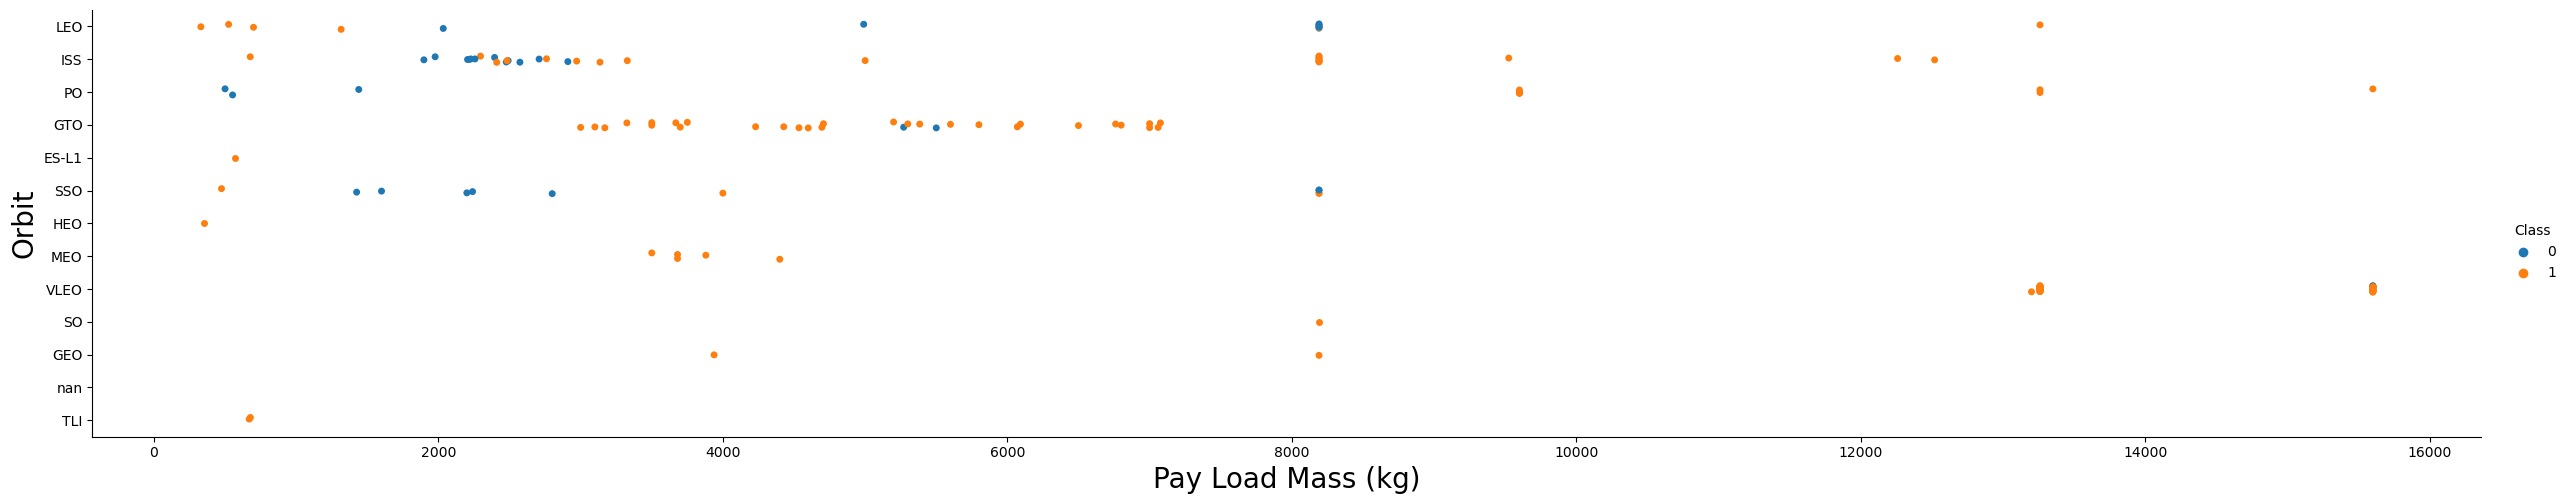

In [12]:
sns.catplot(y="Orbit", x="PayloadMass", hue="Class", data=df, aspect = 5)
plt.xlabel("Pay Load Mass (kg)",fontsize=20)
plt.ylabel("Orbit",fontsize=20)
plt.show()

We can again see that all launches with Pay load Mass greater than <b>8000 kg</b> has been successful irrespective of Orbit type.

### Launch success yearly trend

In [13]:
# A function to Extract years from the date 
year=[]
def Extract_year():
    for i in df["Date"]:
        year.append(i.split("-")[0])
    return year

Year = Extract_year()

In [14]:
Class = df['Class'].tolist()

In [16]:
df_yr = pd.DataFrame(Class, Year)
df_yr.reset_index(inplace = True)
df_yr.columns = ['Year', 'Class']
df_yr = df_yr.groupby('Year', as_index = False)['Class'].mean()
df_yr.set_index('Year', inplace =  True)

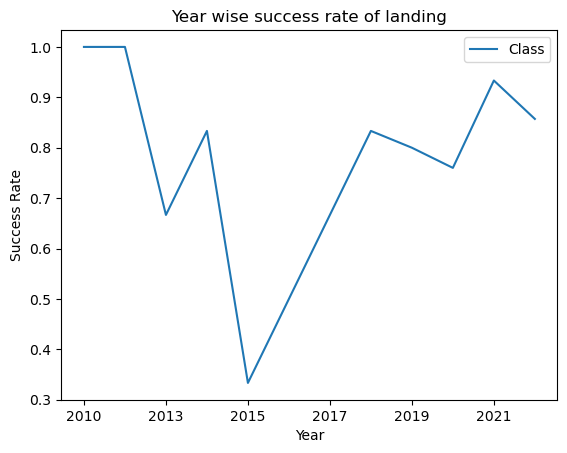

In [17]:
df_yr.plot(kind = 'line')
plt.xlabel('Year')
plt.ylabel('Success Rate')
plt.title('Year wise success rate of landing')
plt.show()

We can see a clear trend in year wise success rate of landing. A sharp dip in year 2015 is very evident. One way to explain this might be the number of flights. In early days, spaceX launched very few rockest with utmost care, thus high success rate. Eventually when they started experimenting more and launching more rockets, the success rate fell and then in with technical development and learned expertise success rate has increased in recent years.

## Features Engineering 

In [18]:
features = df[['FlightNumber', 'PayloadMass', 'Orbit', 'LaunchSite', 'Flights', 'GridFins', 'Reused', 'Legs', 'LandingPad', 'Block', 'ReusedCount', 'Serial']]
features.head()

,FlightNumber,PayloadMass,Orbit,LaunchSite,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial
0,1,8191.07911,LEO,CCSFS SLC 40,1,False,False,False,NaN,1.0,0,B0003
1,2,525.00000,LEO,CCSFS SLC 40,1,False,False,False,NaN,1.0,0,B0005
2,3,677.00000,ISS,CCSFS SLC 40,1,False,False,False,NaN,1.0,0,B0007
3,4,500.00000,PO,VAFB SLC 4E,1,False,False,False,NaN,1.0,0,B1003
4,5,3170.00000,GTO,CCSFS SLC 40,1,False,False,False,NaN,1.0,0,B1004


Dummy variables for categorical data

In [19]:
features_one_hot = pd.get_dummies(features, columns = ['Orbit', 'LaunchSite','LandingPad','Serial'])
features_one_hot = features_one_hot.astype('float64') #Casting all numeric variables to float64
features_one_hot.head()

,FlightNumber,PayloadMass,Flights,GridFins,Reused,Legs,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,...,Serial_B1060,Serial_B1061,Serial_B1062,Serial_B1063,Serial_B1067,Serial_B1069,Serial_B1071,Serial_B1072,Serial_B1073,Serial_B1077
0,1.0,8191.07911,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2.0,525.00000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3.0,677.00000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4.0,500.00000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5.0,3170.00000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [20]:
features_one_hot.to_csv('SpaceX_3.csv', index=False)